In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [630]:
train_data = pd.read_excel(r'data/Data_Train.xlsx')

<Axes: >

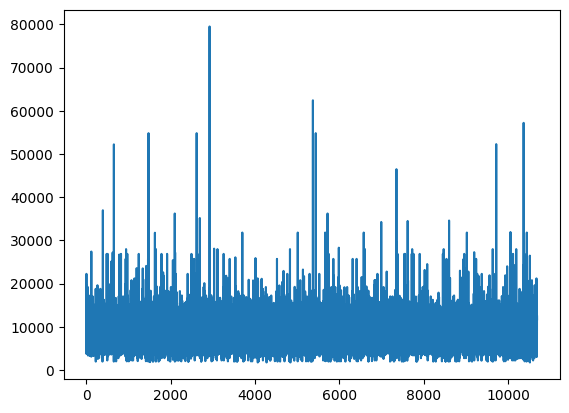

In [631]:
train_data.Price.plot()

In [632]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [633]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [634]:
# import dataset

In [635]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [636]:
train_data.shape

(10683, 11)

In [637]:
train_data[train_data.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [638]:
train_data.dropna(inplace=True)

In [639]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [640]:
# preprocessing and perform feature engineering of 'Date_of_Journey'

In [641]:
data = train_data.copy()

In [642]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [643]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [644]:
def change_into_date(col):
  data[col] = pd.to_datetime(data[col])

In [645]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [646]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
  change_into_date(feature)

C:\Users\modern14\AppData\Local\Temp\ipykernel_26168\3047374196.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\modern14\AppData\Local\Temp\ipykernel_26168\3047374196.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\modern14\AppData\Local\Temp\ipykernel_26168\3047374196.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [647]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [648]:
data.Date_of_Journey.min()

Timestamp('2019-03-01 00:00:00')

In [649]:
data.Date_of_Journey.max()

Timestamp('2019-06-27 00:00:00')

In [650]:
# this data belongs to 2019 only, so extracting the year feature makes no sense

In [651]:
# do feature engineering of 'Date_of_Journey' and fetch the day and month

In [652]:
data.Date_of_Journey.dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [653]:
data['journey_day'] = data.Date_of_Journey.dt.day

In [654]:
data['journey_month'] = data.Date_of_Journey.dt.month

In [655]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-03-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-12 05:50:00,2025-03-12 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-03-12 18:05:00,2025-03-12 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-03-12 16:50:00,2025-03-12 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [656]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [657]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-03-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-12 05:50:00,2025-03-12 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-03-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-03-12 18:05:00,2025-03-12 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-03-12 16:50:00,2025-03-12 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [658]:
# clean 'Dep_Time' and 'Arrival_Time' and do feature engineering

In [659]:
def extract_hour_min(df, col):
  df[col + '_hour'] = df[col].dt.hour
  df[col + '_min'] = df[col].dt.minute
  df.drop(col, axis=1, inplace=True)
  return df.head()

In [660]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-03-12 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-03-12 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-03-12 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [661]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [662]:
# analyse when will most of the flights took off

In [663]:
def flight_dep_time(x):
  if x > 4 and x <= 8:
    return 'early morning'
  
  elif x > 8 and x <= 12:
    return 'morning'
  
  elif x > 12 and x <= 16:
    return 'noon'
  
  elif x > 16 and x <= 20:
    return 'evening'
  
  elif x > 20 and x <= 24:
    return 'night'
  
  else:
    return 'late night'

<Axes: xlabel='Dep_Time_hour'>

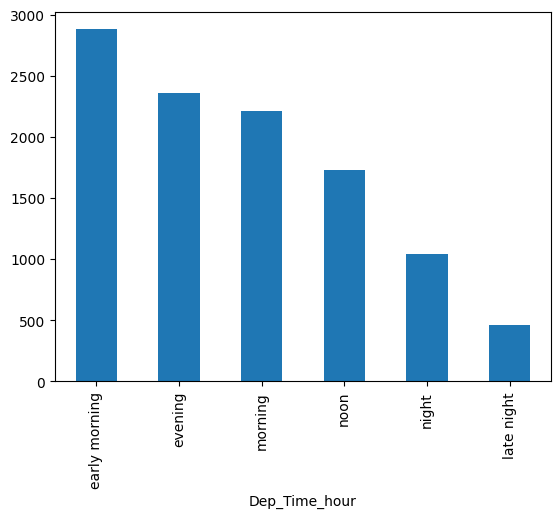

In [664]:
data.Dep_Time_hour.apply(flight_dep_time).value_counts().plot(kind='bar')

<Axes: ylabel='count'>

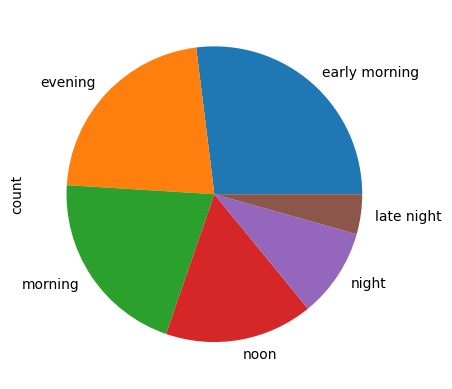

In [665]:
data.Dep_Time_hour.apply(flight_dep_time).value_counts().plot(kind='pie')

In [666]:
# preprocess duration feature and extract meaningful features

In [667]:
data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [668]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h ' + x

  elif 'm' not in x:
    x = x + ' 0m'

  return x

In [669]:
data.Duration = data.Duration.apply(preprocess_duration)

In [670]:
data.Duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [671]:
data.Duration[0].split(' ')[0]

'2h'

In [672]:
int(data.Duration[0].split(' ')[0][0:-1])

2

In [673]:
int(data.Duration[0].split(' ')[1][0:-1])

50

In [674]:
data['Duration_hours'] = data.Duration.apply(lambda x: int(x.split(' ')[0][0:-1]))

In [675]:
data['Duration_mins'] = data.Duration.apply(lambda x: int(x.split(' ')[1][0:-1]))

In [676]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [677]:
# analyse whehter duration impacts on price or not

In [678]:
data.Duration.str.replace('h', '*60')

0        2*60 50m
1        7*60 25m
2        19*60 0m
3        5*60 25m
4        4*60 45m
           ...   
10678    2*60 30m
10679    2*60 35m
10680     3*60 0m
10681    2*60 40m
10682    8*60 20m
Name: Duration, Length: 10682, dtype: object

In [679]:
data.Duration.str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1')

0        2*60+50*1
1        7*60+25*1
2        19*60+0*1
3        5*60+25*1
4        4*60+45*1
           ...    
10678    2*60+30*1
10679    2*60+35*1
10680     3*60+0*1
10681    2*60+40*1
10682    8*60+20*1
Name: Duration, Length: 10682, dtype: object

In [680]:
data.Duration.str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [681]:
data['Duration_total_mins'] = data.Duration.str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [682]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45,285


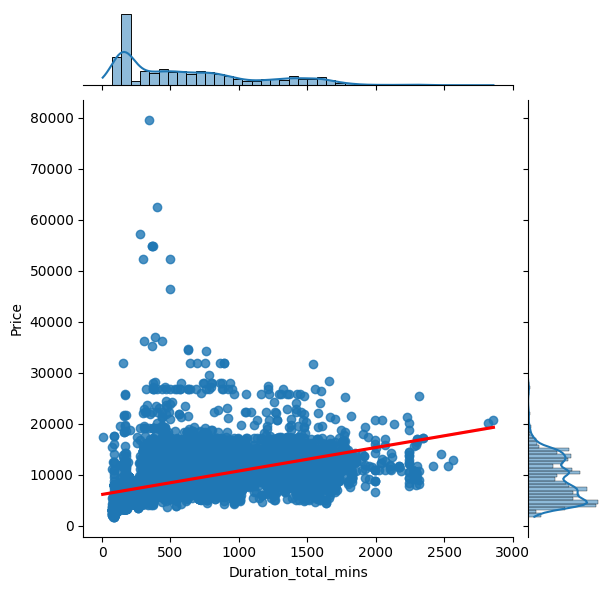

In [683]:
plot = sns.jointplot(x='Duration_total_mins', y='Price', data=data, kind='reg')
regline = plot.ax_joint.get_lines()[0]
regline.set_color('red')

In [684]:
# as the duration of minute increases, the price also increases

In [685]:
# which city has the maximum of final destination flights

In [686]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='count'>

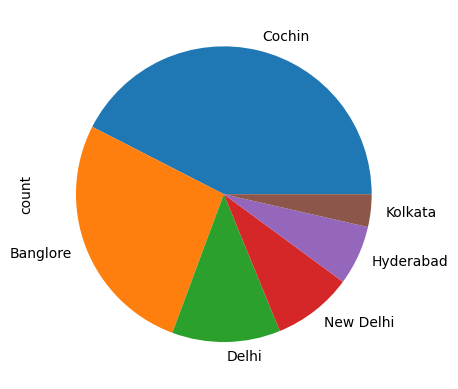

In [687]:
data.Destination.value_counts().plot(kind='pie')

In [688]:
# Delhi labels need to be corrected

In [689]:
# airline vs price analysis

In [690]:
# find the price distribution of each airline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

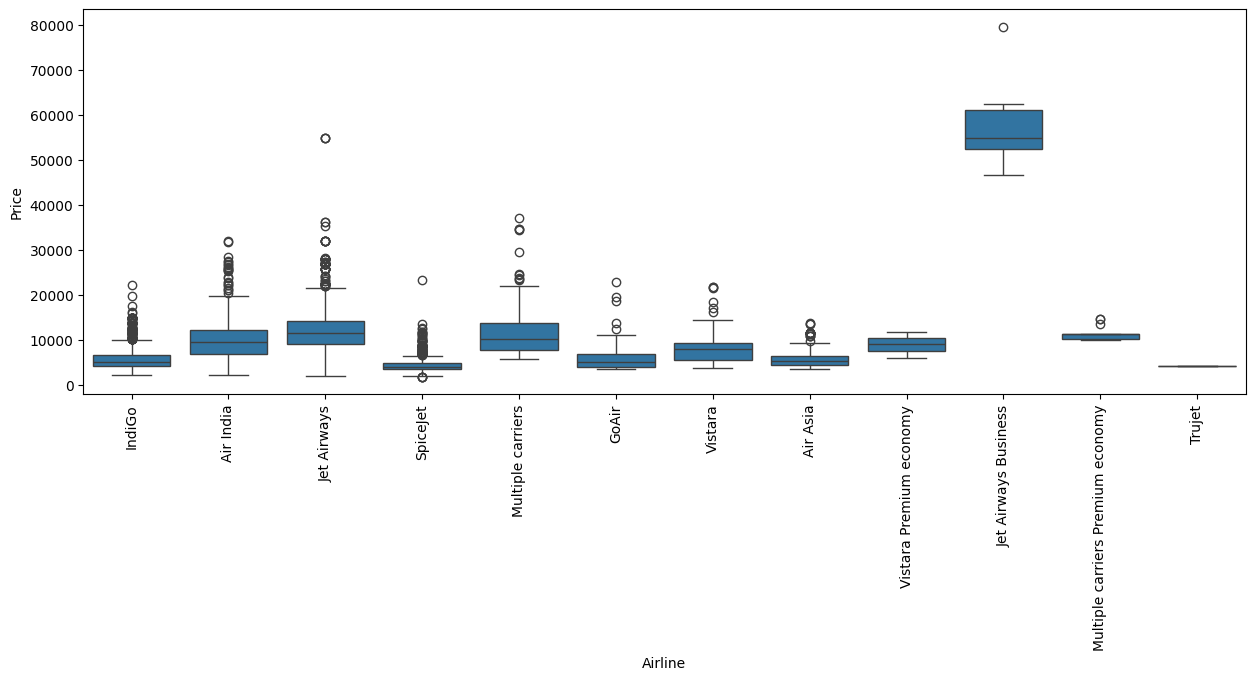

In [691]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price', x='Airline', data=data)
plt.xticks(rotation='vertical')

In [692]:
# perform feature encoding on the data

In [693]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45,285


In [694]:
np.round(data.Additional_Info.value_counts() / len(data) * 100, 2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: count, dtype: float64

In [695]:
# additional info contains 78 percent of no info so we can drop it

In [696]:
data.drop(columns=['Additional_Info', 'Route', 'Duration'], axis=1, inplace=True)

In [697]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,285


In [698]:
# separate categorical data and numerical data

In [699]:
[col for col in data.columns if data[col].dtype == 'object']

['Airline', 'Source', 'Destination', 'Total_Stops']

In [700]:
[col for col in data.columns if data[col].dtype != 'object']

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [701]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [702]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [703]:
# handling categorical data

In [704]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [705]:
data.Source.apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [706]:
for category in data.Source.unique():
  data['Source_' + category] = data.Source.apply(lambda x: 1 if x == category else 0)

In [707]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [708]:
# perform target guided mean encoding

In [709]:
data.groupby('Airline').Price.mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [710]:
airlines = data.groupby('Airline').Price.mean().sort_values().index

In [711]:
{key:index for index, key in enumerate(airlines, 0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [712]:
dict1 = {key:index for index, key in enumerate(airlines, 0)}

In [713]:
data.Airline = data.Airline.map(dict1)

In [714]:
data.Airline

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [715]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [716]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [717]:
data.Destination.replace('New Delhi', 'Delhi', inplace=True)

C:\Users\modern14\AppData\Local\Temp\ipykernel_26168\3596056012.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [718]:
data.groupby('Destination').Price.mean().sort_values().index

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [719]:
dest = data.groupby('Destination').Price.mean().sort_values().index

In [720]:
dict2 = {key:index for index, key in enumerate(dest, 0)}

In [721]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [722]:
data.Destination=data.Destination.map(dict2)

In [723]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,non-stop,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,2 stops,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,2 stops,13882,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,1 stop,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,1 stop,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [724]:
# perform manual encoding on total_stops feature

In [725]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [726]:
{'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [727]:
stops = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [728]:
data.Total_Stops = data.Total_Stops.map(stops)

In [729]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,2,13882,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,1,6218,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,Banglore,2,1,13302,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [730]:
# perform outlier detection

In [731]:
def plot(df, col):
  fig,(ax1, ax2, ax3) = plt.subplots(3, 1)
  sns.histplot(df[col], ax=ax1, kde=True)
  sns.boxplot(df[col], ax=ax2, orient='h')
  sns.histplot(df[col], ax=ax3, kde=True)

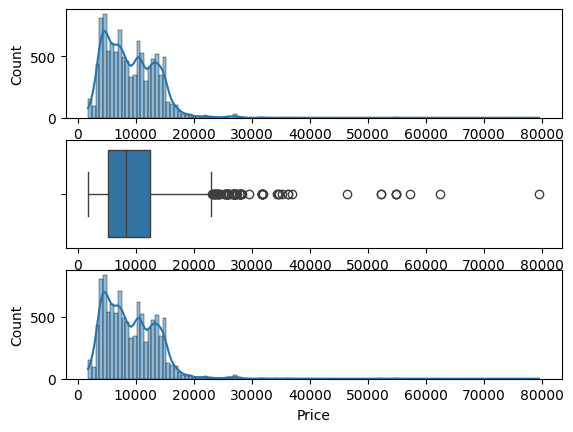

In [732]:
plot(data, 'Price')

In [733]:
# getting a high level overview of various ways to deal with outliers

In [734]:
np.where(data.Price >= 35000, data.Price.median(), data.Price)

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [735]:
data.Price = np.where(data.Price >= 35000, data.Price.median(), data.Price)

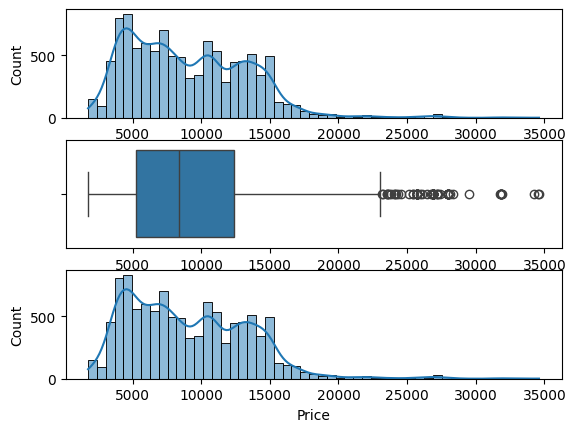

In [736]:
plot(data, 'Price')

In [737]:
data.drop(columns=['Source'],axis=1,inplace=True)

In [738]:
data.head()

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,285,1,0,0,0,0


In [739]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int32
journey_month            int32
Dep_Time_hour            int32
Dep_Time_min             int32
Arrival_Time_hour        int32
Arrival_Time_min         int32
Duration_hours           int64
Duration_mins            int64
Duration_total_mins      int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

In [740]:
# performing feature selection

In [741]:
from sklearn.feature_selection import mutual_info_regression

In [742]:
x = data.drop('Price', axis=1)

In [743]:
y = data.Price

In [744]:
mutual_info_regression(x, y)

array([1.32255344, 1.05925778, 0.78813251, 0.361494  , 0.63198253,
       0.93111979, 0.74939072, 1.14091052, 0.90287993, 1.12382248,
       0.67370154, 1.78250054, 0.38473225, 0.4520336 , 0.51559185,
       0.13123209, 0.20683756])

In [745]:
pd.DataFrame(mutual_info_regression(x, y), index=x.columns)

,0
Airline,1.316611
Destination,1.062053
Total_Stops,0.793630
journey_day,0.375834
journey_month,0.631545
Dep_Time_hour,0.919410
Dep_Time_min,0.753230
Arrival_Time_hour,1.149682
Arrival_Time_min,0.904672
Duration_hours,1.124278


In [746]:
imp = pd.DataFrame(mutual_info_regression(x, y), index=x.columns)
imp.columns = ['importance']

In [747]:
imp.sort_values(by='importance',ascending=False)

,importance
Duration_total_mins,1.775829
Airline,1.318173
Arrival_Time_hour,1.137269
Duration_hours,1.128831
Destination,1.056720
Dep_Time_hour,0.931503
Arrival_Time_min,0.901161
Total_Stops,0.794442
Dep_Time_min,0.750688
Duration_mins,0.671988


In [748]:
# build ml model and then save it

In [749]:
from sklearn.model_selection import train_test_split

In [750]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [751]:
from sklearn.ensemble import RandomForestRegressor

In [752]:
ml_model = RandomForestRegressor()

In [753]:
model = ml_model.fit(X_train, y_train)

In [754]:
y_pred = model.predict(X_test)

In [755]:
y_pred

array([16803.32,  5540.59,  8716.35, ...,  3551.51,  6239.29,  6835.07])

In [756]:
y_pred.shape

(2671,)

In [757]:
len(X_test)

2671

In [758]:
# save ml model

In [759]:
import pickle

In [762]:
file = open('data/rf_random.pkl', 'wb')

In [764]:
pickle.dump(model, file)

In [765]:
model = open('data/rf_random.pkl','rb')

In [766]:
forest = pickle.load(model)

In [767]:
forest.predict(X_test)

array([16803.32,  5540.59,  8716.35, ...,  3551.51,  6239.29,  6835.07])

In [ ]:
# defining own evaluation metrics (mean absolute percentage error)

In [771]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)

  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [772]:
mape(y_test, forest.predict(X_test))

13.200615258586406

In [152]:
# automate ml pipeline

In [775]:
def predict(ml_model):
  model = ml_model.fit(X_train, y_train)
  print('training score: {}'.format(model.score(X_train, y_train)))

  y_pred=model.predict(X_test)
  print('prediction result: {} \n'.format(y_pred))

  from sklearn import metrics
  r2_score = metrics.r2_score(y_test, y_pred)
  print('r2_score: {}'.format(r2_score))

  print('mse: ', metrics.mean_squared_error(y_test, y_pred))
  print('mae: ', metrics.mean_absolute_error(y_test, y_pred))
  print('rmse: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('mape: ', mape(y_test, y_pred))

  sns.histplot(y_test - y_pred, kde=True)

training score: 0.9510084432833472
prediction result: [16838.6   5412.98  8671.04 ...  3548.11  6212.92  6935.21] 

r2_score: 0.8169947386759661
mse:  3562673.164123718
mae:  1166.088391000852
rmse:  1887.5044805572563
mape:  13.12457309689654


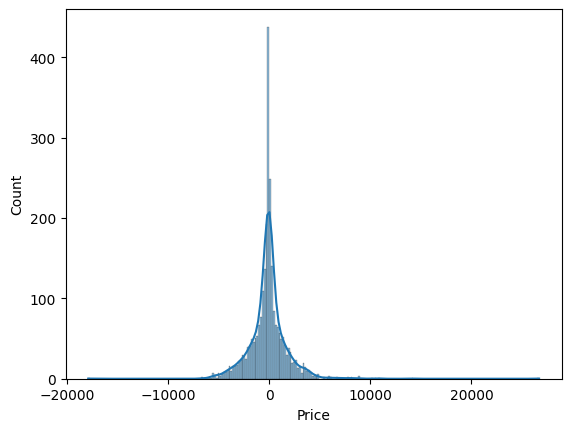

In [776]:
predict(RandomForestRegressor())

In [155]:
# hypertune the model

In [777]:
from sklearn.model_selection import RandomizedSearchCV

In [778]:
reg_rf = RandomForestRegressor()

In [804]:
random_grid = {
    'n_estimators': np.arange(10, 201, 10),  # Number of trees in the forest (e.g., 10, 20, ..., 200)
    'max_features': ['sqrt', 'log2', None],  # Max features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Max depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

In [805]:
random_grid

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200]),
 'max_features': ['sqrt', 'log2', None],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [806]:
rf_random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [807]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
                   verbose=2)

In [808]:
rf_random.best_params_

{'n_estimators': 180,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [809]:
y_pred2_random = rf_random.predict(X_test)

training score: 0.9274543147458219
prediction result: [16738.93390372  5211.77138668  8679.05736332 ...  3630.54646425
  6710.94046056  6783.43419753] 

r2_score: 0.8280246927962063
mse:  3347946.4329828215
mae:  1138.5151362404115
rmse:  1829.7394440145902
mape:  12.812525462488514


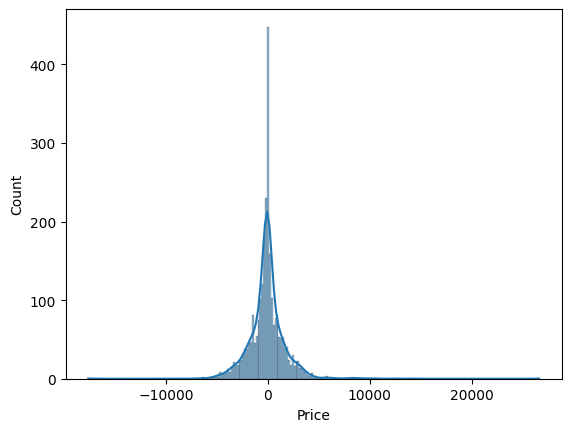

In [810]:
predict(rf_random.best_estimator_)